# Import section

All necessary imports should be placed here.

In [704]:
import math

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist

## Data Import

In [705]:
x0_data = np.loadtxt('../data/nonlinear_vectorfield_data_x0.txt')
x1_data = np.loadtxt('../data/nonlinear_vectorfield_data_x1.txt')

delta_t = 0.01

# Task Implementations

## Methods

In [706]:
def finite_difference(dataset_1, dataset_2, delta_t):
    return (dataset_2 - dataset_1) / delta_t

def estimate_A(dataset_1, dataset_2, delta_t):
    derivatives = finite_difference(dataset_1, dataset_2, delta_t)
    return np.linalg.lstsq(dataset_1, derivatives, rcond=1e-5)[0]

def calculate_mean_squared_error(dataset_true, dataset_approx):
    return np.mean(np.sum((dataset_true - dataset_approx)**2, axis=1))

def linear_system(t, x, A):
    return A.dot(x)

def solve_linear_equation(A, x_0, delta_t):
    t_eval = np.linspace(0, delta_t, 100)
    sol = solve_ivp(linear_system, (0, delta_t), x_0, args=(A,), t_eval=t_eval, dense_output=True)
    return sol.sol(delta_t)


In [707]:
def chose_centers(x, n_bases):
    centers = x[np.random.choice(range(x.shape[0]), replace=False, size=n_bases)] 
    return centers

def rbf(x, centers, eps):
    phi = np.exp(-cdist(x, centers) ** 2 / eps ** 2)
    return phi

def rbf_system(t, y, centers, C, eps):
    y = y.reshape(1, y.shape[-1])
    phi = np.exp(-cdist(y, centers) ** 2 / eps ** 2)
    return phi @ C

def solve_rbf_system(x_0, delta_t, centers, C, eps):
    t_eval = np.linspace(0, delta_t, 100)
    sol = solve_ivp(rbf_system, (0, delta_t), x_0, args=(centers, C, eps), t_eval=t_eval, dense_output=True)
    return sol.sol(delta_t)

## Task 1

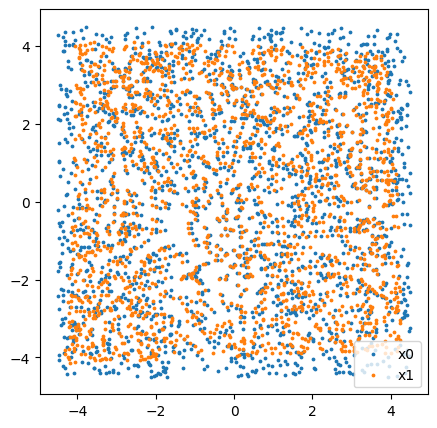

In [708]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(x0_data[:,0], x0_data[:, 1], s = 3, label='x0')
ax.scatter(x1_data[:,0], x1_data[:, 1], s = 3, label="x1")
#ax.set_title("Original $x_0$ and $x_1$ datasets")
ax.legend()

In [709]:
A = estimate_A(x0_data,x1_data, delta_t)
V = finite_difference(x0_data, x1_data, delta_t)

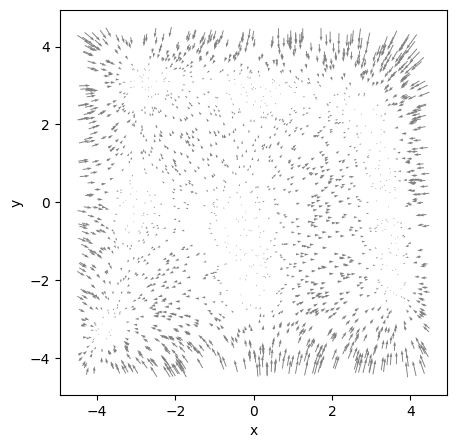

In [710]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.quiver(x0_data[:,0], x0_data[:, 1], V[:,0], V[:, 1], color='grey')
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_title("Vector field with finite-difference")
plt.show()

In [711]:
x1_hat = np.array([solve_linear_equation(A, x_0, delta_t) for x_0 in x0_data])
print("Mean squared error for linear system: ", calculate_mean_squared_error(x1_data, x1_hat))

Mean squared error for linear system:  0.037291879159319974


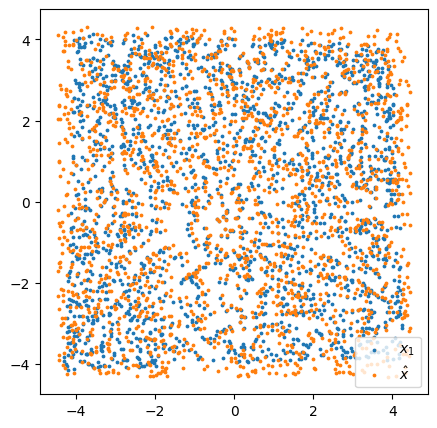

In [712]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(x1_data[:,0], x1_data[:, 1], s = 3, label='$x_1$')
ax.scatter(x1_hat[:,0], x1_hat[:, 1], s = 3, label="$\hat{x}$")
#ax.set_title("Original $x_1$ and $\hat{x}$ comparison")
ax.legend()

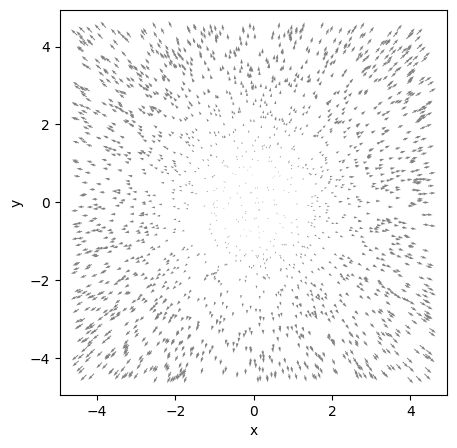

In [713]:
fig3 = plt.figure(figsize=(5,5))
ax3 = fig3.add_subplot()
ax3.quiver(x0_data[:,0], x0_data[:, 1], x1_hat[:,0], x1_hat[:, 1], color='grey')
ax3.set_xlabel("x")
ax3.set_ylabel("y")
#ax3.set_title("Original $x_1$ and $\hat{x}$ vector field")
plt.show()

## Task 2

In [714]:
num_center_list = list(range(100, 1001, 50))
eps_list = [0.1, 0.3, 0.5, 0.7, 1]
V = finite_difference(x0_data, x1_data, delta_t)

In [691]:
best_result = math.inf
best_center_count = num_center_list[0]
best_prediction = None
best_centers = None
best_C = None
best_eps = eps_list[0]

for eps in eps_list:
    for num_centers in num_center_list:
        centers = chose_centers(x0_data, num_centers)
        phi = rbf(x0_data, centers, eps)
        C = np.linalg.lstsq(a=phi, b=V, rcond=1e-5)[0]

        x1_hat = np.array([solve_rbf_system(x_0, delta_t, centers, C, eps) for x_0 in x0_data])
        mse_score = calculate_mean_squared_error(x1_data, x1_hat)

        if mse_score < best_result:
            best_result = mse_score
            best_center_count = num_centers
            best_prediction = x1_hat
            best_centers = centers
            best_C = C
            best_eps = eps
        print(f"Number of centers: {num_centers} with MSE score: {mse_score}")

print(f"-----\nBest number of center count: {best_center_count} and $\epsilon$: {best_eps} with MSE score: {best_result}")

Number of centers: 100 with MSE score: 0.0025157382970372568
Number of centers: 150 with MSE score: 0.0011009776285579827
Number of centers: 200 with MSE score: 0.0008647074030787786
Number of centers: 250 with MSE score: 0.0008463652620890612
Number of centers: 300 with MSE score: 0.0008546944205213894
Number of centers: 350 with MSE score: 0.0008456078546636103
Number of centers: 400 with MSE score: 0.0008391206013397596
Number of centers: 450 with MSE score: 0.0008450153529729656
Number of centers: 500 with MSE score: 0.0008443578117175059
Number of centers: 550 with MSE score: 0.0008445335382033742
Number of centers: 600 with MSE score: 0.0008443429083551513
Number of centers: 650 with MSE score: 0.0008445066378556943
Number of centers: 700 with MSE score: 0.0008437882658771305
Number of centers: 750 with MSE score: 0.0008450532242437709
Number of centers: 800 with MSE score: 0.000843988176298785
Number of centers: 850 with MSE score: 0.0008448602929186014
Number of centers: 900 wi

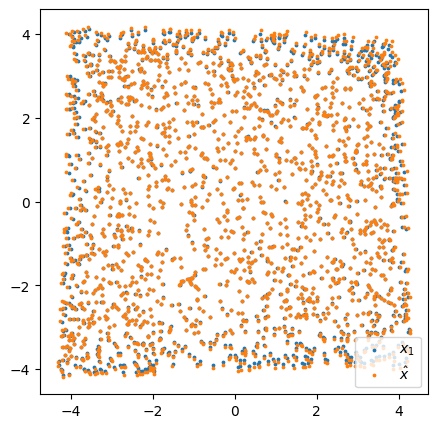

In [692]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(x1_data[:,0], x1_data[:, 1], s = 3, label='$x_1$')
ax.scatter(best_prediction[:,0], best_prediction[:, 1], s = 3, label="$\hat{x}$")
#ax.set_title("Original $x_1$ and $\hat{x}$ comparison")
ax.legend()

## Task 3

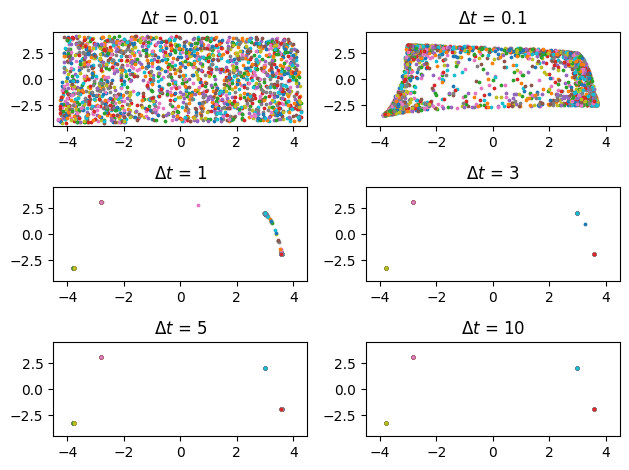

In [703]:
delta_values = [0.01, 0.1, 1, 3, 5, 10]
fig, axs = plt.subplots(3, 2)
axs = axs.flatten()

for i in range(6):
    ax = axs[i]
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.set_title(f"$\Delta t$ = {delta_values[i]}")

    for j in range(len(x0_data)):
        sol = solve_rbf_system(x0_data[j], delta_values[i], best_centers, best_C, best_eps)
        ax.scatter(sol[0], sol[1], s=3)

#fig.suptitle('RBF system representation with different delta ')
plt.tight_layout()
plt.show()
